#### Machine Learning/ Assignment #2
#### Mehdi Abbasi-Azadgoleh (UW#: 20335400)

In [15]:
#Import the packages

import numpy as np
import pandas as pd
from collections import Counter
import random
import statistics as stat
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#### Importing Data

In [16]:
#importing data from Excel as a numpy array
testData = pd.read_csv("knn-dataset/testData.csv",sep=',',header=None).values

testLabels = pd.read_csv("knn-dataset/testLabels.csv",sep=',',header=None).values

trainData = np.zeros([1000,64])
trainLabels = np.zeros([1000,1])

trainData[0:100] = pd.read_csv("knn-dataset/trainData1.csv",sep=',',header=None).values
trainData[100:200] = pd.read_csv("knn-dataset/trainData2.csv",sep=',',header=None).values
trainData[200:300] = pd.read_csv("knn-dataset/trainData3.csv",sep=',',header=None).values
trainData[300:400] = pd.read_csv("knn-dataset/trainData4.csv",sep=',',header=None).values
trainData[400:500] = pd.read_csv("knn-dataset/trainData5.csv",sep=',',header=None).values
trainData[500:600] = pd.read_csv("knn-dataset/trainData6.csv",sep=',',header=None).values
trainData[600:700] = pd.read_csv("knn-dataset/trainData7.csv",sep=',',header=None).values
trainData[700:800] = pd.read_csv("knn-dataset/trainData8.csv",sep=',',header=None).values
trainData[800:900] = pd.read_csv("knn-dataset/trainData9.csv",sep=',',header=None).values
trainData[900:1000] = pd.read_csv("knn-dataset/trainData10.csv",sep=',',header=None).values

trainLabels[0:100] = pd.read_csv("knn-dataset/trainLabels1.csv",sep=',',header=None).values
trainLabels[100:200] = pd.read_csv("knn-dataset/trainLabels2.csv",sep=',',header=None).values
trainLabels[200:300] = pd.read_csv("knn-dataset/trainLabels3.csv",sep=',',header=None).values
trainLabels[300:400] = pd.read_csv("knn-dataset/trainLabels4.csv",sep=',',header=None).values
trainLabels[400:500] = pd.read_csv("knn-dataset/trainLabels5.csv",sep=',',header=None).values
trainLabels[500:600] = pd.read_csv("knn-dataset/trainLabels6.csv",sep=',',header=None).values
trainLabels[600:700] = pd.read_csv("knn-dataset/trainLabels7.csv",sep=',',header=None).values
trainLabels[700:800] = pd.read_csv("knn-dataset/trainLabels8.csv",sep=',',header=None).values
trainLabels[800:900] = pd.read_csv("knn-dataset/trainLabels9.csv",sep=',',header=None).values
trainLabels[900:1000] = pd.read_csv("knn-dataset/trainLabels10.csv",sep=',',header=None).values

#### Data Processing

In [17]:
#Changing the class labels from 5,6 to 0,1 (y={0,1})
trainLabels = (trainLabels - 5)
testLabels = (testLabels-5)

#### Q1.a) Mixture of Gaussians

> Learning the parameters

In [18]:
#Computing Pi as the probability of C1 (the class with label 1) 
pi = sum(trainLabels) / len(trainLabels)
Pr_C1 = pi
Pr_C2 = 1 - pi

#Computing average of PDF 
N1 = Counter(trainLabels.reshape(len(trainLabels)))[1]
N2 = Counter(trainLabels.reshape(len(trainLabels)))[0]
N = N1 + N2

mu1 = np.zeros([trainData.shape[1],1])
mu2 = np.zeros([trainData.shape[1],1])

for i in range(len(trainLabels)):
    mu1 += (trainLabels[i] * np.array([trainData[i]]).T) / N1
    mu2 += ((1 - trainLabels[i]) * np.array([trainData[i]]).T) / N2

# #Computing CapitalSigma
S1 = np.zeros([trainData.shape[1], trainData.shape[1]])
S2 = np.zeros([trainData.shape[1], trainData.shape[1]])

for i in range(len(trainLabels)):
    if (trainLabels[i] == 1):
        S1 += np.dot(np.array([trainData[i]]).T - mu1, (np.array([trainData[i]]).T - mu1).T) / N1
    else:
        S2 += np.dot(np.array([trainData[i]]).T - mu2, (np.array([trainData[i]]).T - mu2).T) / N2

sigma = N1 / N * S1 + N2 / N * S2
print('Diagonal Elements of Sigma Matrix:\n',sigma.diagonal())

Diagonal Elements of Sigma Matrix:
 [40.06966  39.82214  43.393942 42.766668 40.430838 42.431356 43.962156
 35.76039  37.639996 39.744748 41.88718  42.250886 43.980198 40.399208
 39.59391  37.22228  35.94983  40.826518 42.785502 46.726278 39.7868
 38.79184  35.49763  36.49206  36.55942  40.446368 40.62147  46.540702
 45.725294 43.487948 37.28763  36.988752 37.872256 42.13782  41.990942
 44.39835  45.407326 45.28368  42.051222 32.90459  37.272616 39.713326
 40.32731  44.527966 46.29971  43.68424  43.72803  35.242856 35.657142
 40.4655   44.1844   44.524166 46.08703  44.612656 43.811694 38.729336
 37.56372  37.560716 45.240582 42.59006  42.565548 43.998198 42.671948
 40.080134]


> Testing Mixture of Gaussians Algorithm with Test DataSet

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
#======================================================

In [20]:
sigmaInverse = np.linalg.inv(sigma)
w = np.dot(sigmaInverse, (mu1-mu2))
w0 = -1/2 * np.dot(mu1.T, np.dot(sigmaInverse, mu1)) \
     + 1/2 * np.dot(mu2.T, np.dot(sigmaInverse, mu2)) \
     + np.log(Pr_C1 / Pr_C2)

classifiedLabels = np.zeros([len(testData), 1])

#Calculating the accuracy of classification
for i in range(len(testData)):
    if (sigmoid(np.dot(w.T, np.array([testData[i]]).T) + w0) > 0.5):
        classifiedLabels[i] = 1
    else:
        classifiedLabels[i] = 0

accuracy = (len(testData)-sum(np.abs(classifiedLabels - testLabels)))/len(testData)*100
print ("Classification Accuracy % = ", accuracy)

Classification Accuracy % =  [89.09090909]


#### Q1.b) Logestic Regresion

In [21]:
# Adding one to each data set 
trainDataBar = np.append(np.ones([len(trainData),1]), trainData, axis=1)
testDataBar = np.append(np.ones([len(testData),1]), testData, axis=1)

#trainDataBar = (trainDataBar - np.min(trainDataBar))/(np.max(trainDataBar) - np.min(trainDataBar))
#testDataBar = (testDataBar - np.min(testDataBar))/(np.max(testDataBar) - np.min(testDataBar))

In [22]:
def gradient(w, Xbar, labels):
    grad = np.zeros(w.shape[0]) 
    
    for n in range(Xbar.shape[0]):
        grad += (sigmoid(w.dot(Xbar[n,:]))- labels[n]) * Xbar[n,:] 
    
    return grad
#===============================================

def Hessian(w, Xbar):
    R = np.zeros([Xbar.shape[0], Xbar.shape[0]])

    for i in range(Xbar.shape[0]):
        sigma_i = sigmoid(w.dot(Xbar[i,:]))  
        R[i,i] = sigma_i * (1 - sigma_i)
    
    H =  Xbar.T.dot(R).dot(Xbar) 
    
    return H
#=================================================

Max Accuracy % =  88.7
Max accuracy happens @ lamda= 6380


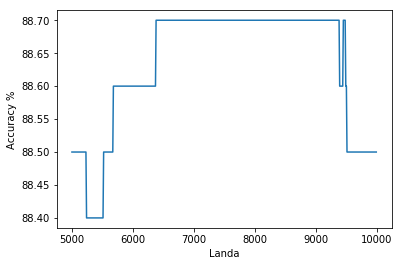

In [9]:
kfolds=10

#lamda= [np.round(i*0.1,1) for i in range(1,400,1)]  #(start, stop, step)
lamda= [i for i in range(5000,10000,10)]  #(start, stop, step)

accuracy= np.zeros(len(lamda))

for i in range(len(lamda)):
    accuracyCross = np.zeros(kfolds)
    
    for j in range(kfolds):
        
        trainDataBar_j = np.delete(trainDataBar,np.arange(j*100,(j+1)*100),0)
        trainLabels_j = np.delete(trainLabels,np.arange(j*100,(j+1)*100),0) 
        
        validateDataBar_j = trainDataBar[j*100:(j+1)*100]
        validateLabels_j = trainLabels[j*100:(j+1)*100]
        
        w = 0.001*np.random.rand(trainDataBar.shape[1])
        #w = np.append(w0, w) 
        w_old = np.zeros(w.shape)

        #for k in range(10):
        #thr = 1000
        #idx = 0
        while(np.linalg.norm(w - w_old)> 1e-15):
            #idx += 1
            w_old = w
            g = gradient (w_old, trainDataBar_j, trainLabels_j) + lamda[i] * w_old
            H = Hessian (w_old, trainDataBar_j) + lamda [i] * np.identity(len(w_old))
            #w = w_old - 0.01*np.linalg.inv(H).dot(g)
            w = w_old - np.linalg.inv(H).dot(g)
            #print(np.linalg.norm(w - w_old))
    #        if idx > thr:
     #           break
                
        classifiedLabels_j = np.zeros(validateLabels_j.shape[0])
        
        for l in range(validateDataBar_j.shape[0]):
            
            if w.dot(validateDataBar_j[l,:]) >= 0:
                classifiedLabels_j[l] = 1
                
            else:
                classifiedLabels_j[l] = 0
        
        accuracyCross[j] = ((validateDataBar_j.shape[0] \
                           - sum(np.abs(classifiedLabels_j - validateLabels_j[:,0]))) \
                           /validateDataBar_j.shape[0])*100

    accuracy[i] = np.average(accuracyCross)
    #print("lamda "+str(lamda[i])+" is calculated!")
plt.plot(lamda, accuracy)
plt.xlabel('Landa')
plt.ylabel('Accuracy %');

print ("Max Accuracy % = ", max(accuracy))
print("Max accuracy happens @ lamda=", lamda[np.argmax(accuracy)])

> Testing Logestic Regression Algorithm with Test DataSet

In [25]:
lamda = 6380

w = 0.001*np.random.rand(trainDataBar.shape[1])
w_old = np.zeros(w.shape)

#idx = 0
while(np.linalg.norm(w - w_old)> 1e-14):
    #idx += 1
    w_old = w
    g = gradient (w_old, trainDataBar, trainLabels) + lamda * w_old
    H = Hessian (w_old, trainDataBar) + lamda * np.identity(len(w))
    w = w_old - np.linalg.inv(H).dot(g)
    #print('Iteration Index:', idx)

classifiedLabels = np.zeros([len(testData), 1])

#Calculating the accuracy of classification
for i in range(testDataBar.shape[0]):
    if w.dot(testDataBar[i,:]) >= 0:
        classifiedLabels[i] = 1
    else:
        classifiedLabels[i] = 0

accuracy = (len(testData)-sum(np.abs(classifiedLabels - testLabels)))/len(testData)*100
print ("Classification Accuracy % = ", accuracy)

Classification Accuracy % =  [89.09090909]


#### Result Discusion

+ In Mixture of Gaussians we need to calculate $\pi$, $\mu$, and $\boldsymbol{\Sigma}$ for each
class, i.e., $6$ parameters for two classes, and then compute $2$ parameters; $\boldsymbol{w}$ 
and $w_0$ coresponding to the linear classifier. So in Mixture of Gaussians the calssifier weights
are derived indirectly and total number of parameters is equal to $8$.  

    However, in Logestic Regression the classifier weight vector $w$ is calculated directly
    from Data Set. In this approach there is not a closed-form solution for weight vector, 
    so we have to use iterative method such as Newton's. Total number of parameter is $1$ 
    wich is derived after $k$ iterations. In this example we set $k$=10. Nevertheless, Newton's 
    method convergence rate is so high we could find the weight with fewer number of iterations when 
    we have sense about the order of weight vector elements, which is 0.01 for this example. 
    Given this sense, I have that we could find the $w$ vector after total number of $6$ iterations. 

    In terms of accuracy, both algoriths are the same. Both algorithms resulted in 89% accuracy. 

    The cost of Computation is higer for Logestic Regression

+ When the data set is linearly seperable (the same as our current data) it seems that 
linear algorithms performs better than nonlinear ones. In this data set Mixture of Gaussians
and Linear Regression classified the test data with ~89% accuracy while the nonlinear classifier
KNN had the test accuracy of ~76%. However if the data points are nonlinearly dixtributed 
then it is speculated that KNN will perform better. 

#### Q2.a) Linear Seperability of Boolean Functions 

+ $\bf{and}$

Yes, it is linearly seperable. $w=[0.5, 0.5]$; $w_0=-0.7$

+ $\bf{or}$

Yes, it is linearly seperable. $w=[1, 1]$; $w_0=-0.1$ 

+ $\bf{exclusive-or}$

No, it is not linearly seperable. $\phi({\bf{x}})=[x_1, x_2, x_1x_2]$; $w=[1, 1, -3]$; $w_0=-0.5$  

+ $\bf{iff (XNOR)}$

No, it is not linearly seperable. $\phi({\bf{x}})=[x_1, x_2, x_1x_2]$; $w=[-1, -1, 3]$; $w_0=0.5$


#### Q2.b) Linear Seperability of Q.1 Training Set

> $\bf {1^{st}Experiment}$: Using the linear regression algorithm developed in Q1.

In [26]:
lamda = 25

w = 0.001*np.random.rand(trainDataBar.shape[1])
w_old = np.zeros(w.shape)

idx = 0

while(np.linalg.norm(w - w_old)> 1e-15):
    idx += 1
    w_old = w
    g = gradient (w_old, trainDataBar, trainLabels) + lamda * w_old
    H = Hessian (w_old, trainDataBar) + lamda * np.identity(len(w))
    w = w_old - np.linalg.inv(H).dot(g)
    print('Iteration Index:', idx)

classifiedLabels = np.zeros([len(trainData), 1])

#Calculating the accuracy of classification
for i in range(trainDataBar.shape[0]):
    if w.dot(trainDataBar[i,:]) >= 0:
        classifiedLabels[i] = 1
    else:
        classifiedLabels[i] = 0

accuracy = (len(trainData)-sum(np.abs(classifiedLabels - trainLabels)))/len(trainData)*100
print ("Classification Accuracy % = ", accuracy)

Iteration Index: 1
Iteration Index: 2
Iteration Index: 3
Iteration Index: 4
Iteration Index: 5
Iteration Index: 6
Iteration Index: 7
Iteration Index: 8
Iteration Index: 9
Iteration Index: 10
Classification Accuracy % =  [89.1]


No the training set in question 1 is not linearly seperable. Since the linear classifier
could not classify the set with the accuracy of 100%.

> $\bf {2^{nd}Experiment}$: Threshold perceptron learning converges iff the data is linearly separable.

In [12]:
#Changing the class labels from 1,0 to 1,-1 (y={1,-1})
for i in range(trainLabels.shape[0]):
    if trainLabels[i] == 0:
            trainLabels[i] = -1

for i in range(testLabels.shape[0]):
    if testLabels[i] == 0:
            testLabels[i] = -1

In [13]:
def calcAccuracy (w, dataSet, dataLabels):

    classifiedLabels = np.zeros([len(dataSet), 1])

    #Calculating the accuracy of classification
    for i in range(dataSet.shape[0]):
        if w.dot(dataSet[i,:]) >= 0:
            classifiedLabels[i] = 1
        else:
            classifiedLabels[i] = -1

    trueClassified = 0

    for i in range(dataSet.shape[0]):
        if np.array_equal(classifiedLabels[i],dataLabels[i]): 
            trueClassified += 1

    accuracy = trueClassified/len(dataSet)*100

    return accuracy

Train Data Classification Accuracy % =  83.89999999999999
Test Data Classification Accuracy % =  84.54545454545455


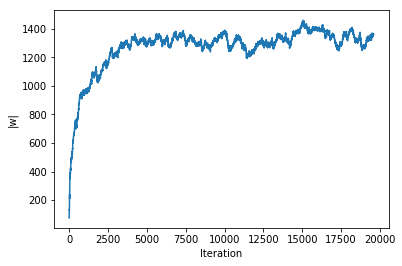

In [14]:
w = 0.01*np.random.rand(trainDataBar.shape[1])
W=[]

idx = 0
thr = 100000

while(idx < thr):

    i = np.random.randint(0,trainData.shape[0])
    #print (i)
    if w.dot(trainDataBar[i]) > 0: 
        classifiedLabel = 1
    else:
        classifiedLabel = -1
    
    if trainLabels[i] != classifiedLabel:
        w = w + trainLabels[i] * trainDataBar[i]
        W.append(np.linalg.norm(w))
    else:
        idx += 1
    
#    print(idx)
#     if idx > thr:
#         break

plt.plot (W)
plt.xlabel('Iteration')
plt.ylabel('|w|');


print ("Train Data Classification Accuracy % = ", calcAccuracy(w, trainDataBar, trainLabels))    
print ("Test Data Classification Accuracy % = ", calcAccuracy(w, testDataBar, testLabels))    
    

$w$ does not converge to specific amout, so the data cannot be completely seperated 
by a single hyperplane. 
However, the linear perceptron algorithm can classify the test and train data with 
the accuracy in the order of 88%.   